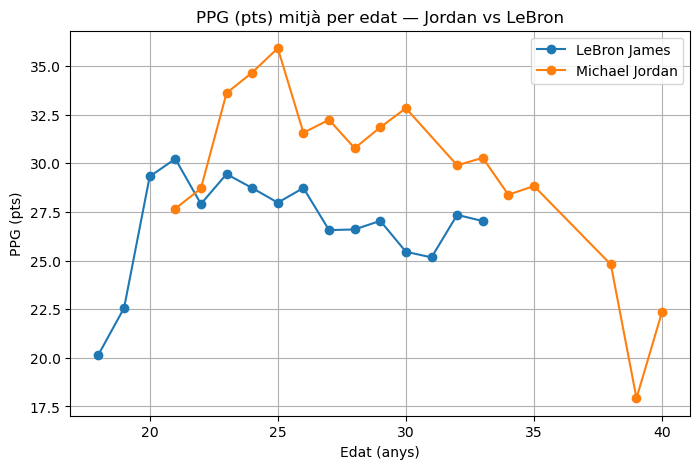

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar datasets
lebron = pd.read_csv("lebron_career.csv", sep=";")
jordan = pd.read_csv("jordan_career.csv", sep=";")

# Funció per extreure l'edat en anys (abans del '-')
def extract_age(age_str):
    return int(str(age_str).split("-")[0])

# Afegir columna age_years
lebron["age_years"] = lebron["age"].apply(extract_age)
jordan["age_years"] = jordan["age"].apply(extract_age)

# Diccionari de mètriques: nom visible → columna del dataset
metrics = {
    "PPG (pts)": "pts",
}

# Generar els 3 gràfics
for title, col in metrics.items():
    plt.figure(figsize=(8,5))

    # Mitjana per edat
    lebron_avg = lebron.groupby("age_years")[col].mean()
    jordan_avg = jordan.groupby("age_years")[col].mean()

    # Plot
    plt.plot(lebron_avg.index, lebron_avg.values, marker="o", label="LeBron James")
    plt.plot(jordan_avg.index, jordan_avg.values, marker="o", label="Michael Jordan")

    plt.xlabel("Edat (anys)")
    plt.ylabel(title)
    plt.title(f"{title} mitjà per edat — Jordan vs LeBron")
    plt.grid(True)
    plt.legend()
    plt.show()


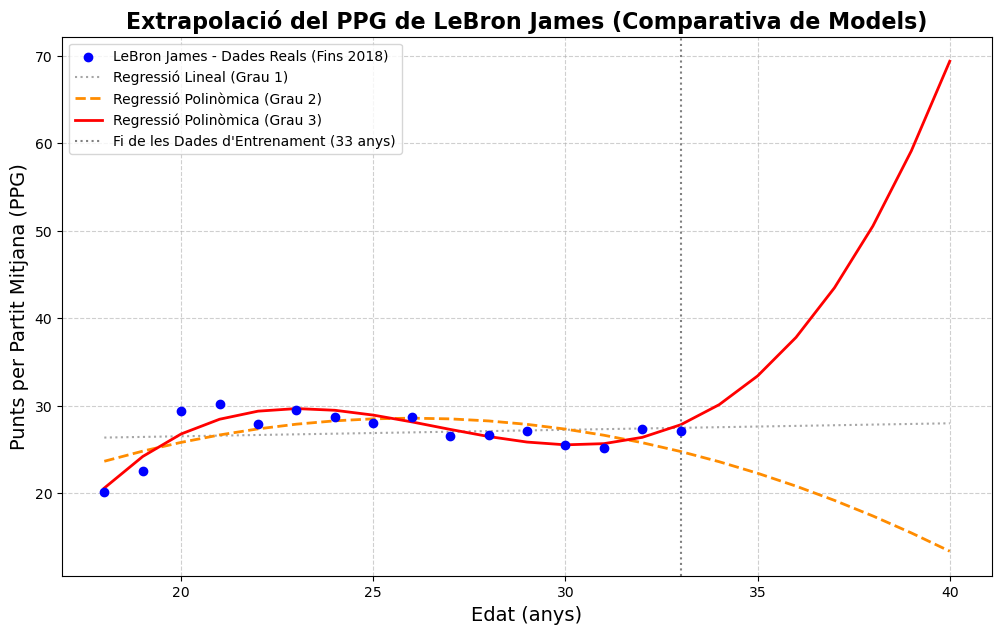


--- Prediccions Extrapolades a 39 Anys ---
Grau 1 (Lineal): 27.89 PPG
Grau 2 (Quadràtica): 15.43 PPG
Grau 3 (Cúbica): 59.12 PPG


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Carregar datasets (assumim que ja estan al directori correcte)
try:
    lebron = pd.read_csv("lebron_career.csv", sep=";")
except FileNotFoundError:
    print("Error: No es pot carregar 'lebron_career.csv'. Assegura't que l'arxiu és al directori correcte.")
    raise

# Funció per extreure l'edat en anys
def extract_age(age_str):
    if pd.isna(age_str) or not isinstance(age_str, str) or '-' not in age_str:
        return None
    try:
        return int(age_str.split("-")[0])
    except ValueError:
        return None

# Afegir columna age_years i assegurar que 'pts' és numèric
lebron["age_years"] = lebron["age"].apply(extract_age)
lebron['pts'] = pd.to_numeric(lebron['pts'], errors='coerce')

# Filtrar valors nuls
lebron.dropna(subset=["age_years", "pts"], inplace=True)

# --- 1. Preparació de les Dades per a la Regressió ---

# Agrupar per l'edat i calcular el PPG mitjà
lebron_avg = lebron.groupby("age_years")["pts"].mean().reset_index()

# Dades d'entrenament (X i Y)
X_train = lebron_avg["age_years"].values.reshape(-1, 1) 
Y_train = lebron_avg["pts"].values

# Definir les edats futures per a la predicció (Extrapolació fins als 40)
X_predict = np.arange(X_train.min(), 41).reshape(-1, 1) 
X_real_data = lebron_avg["age_years"].values.reshape(-1, 1) 

# --- 2. Entrenament dels Models ---

# Model de Grau 1 (Lineal)
model_linear = LinearRegression()
model_linear.fit(X_train, Y_train)
Y_pred_linear = model_linear.predict(X_predict)

# Model de Grau 2 (Quadràtic)
model_poly_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly_2.fit(X_train, Y_train)
Y_pred_poly_2 = model_poly_2.predict(X_predict)

# Model de Grau 3 (Cúbic)
model_poly_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_poly_3.fit(X_train, Y_train)
Y_pred_poly_3 = model_poly_3.predict(X_predict)


# --- 3. Visualització de l'Extrapolació ---

plt.figure(figsize=(12, 7))

# Dades Reals (Part d'Entrenament)
plt.scatter(X_real_data, Y_train, color='blue', label='LeBron James - Dades Reals (Fins 2018)', zorder=5)

# Corba de Predicció Lineal (Grau 1)
plt.plot(X_predict, Y_pred_linear, linestyle=':', color='gray', 
         label='Regressió Lineal (Grau 1)', alpha=0.7)

# Corba de Predicció Polinòmica (Grau 2)
plt.plot(X_predict, Y_pred_poly_2, linestyle='--', color='darkorange', 
         label='Regressió Polinòmica (Grau 2)', linewidth=2)

# Corba de Predicció Polinòmica (Grau 3)
plt.plot(X_predict, Y_pred_poly_3, linestyle='-', color='red', 
         label='Regressió Polinòmica (Grau 3)', linewidth=2)

# Línia de tall entre dades d'entrenament i predicció
max_age_train = X_train.max()
plt.axvline(x=max_age_train, color='gray', linestyle=':', label=f'Fi de les Dades d\'Entrenament ({int(max_age_train)} anys)')


# Afegir títols i etiquetes
plt.title(f'Extrapolació del PPG de LeBron James (Comparativa de Models)', fontsize=16, fontweight='bold')
plt.xlabel('Edat (anys)', fontsize=14)
plt.ylabel('Punts per Partit Mitjana (PPG)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 4. Anàlisi dels Models (Comparativa) ---
print("\n--- Prediccions Extrapolades a 39 Anys ---")
age_39 = np.array([[39]])
print(f"Grau 1 (Lineal): {model_linear.predict(age_39)[0]:.2f} PPG")
print(f"Grau 2 (Quadràtica): {model_poly_2.predict(age_39)[0]:.2f} PPG")
print(f"Grau 3 (Cúbica): {model_poly_3.predict(age_39)[0]:.2f} PPG")

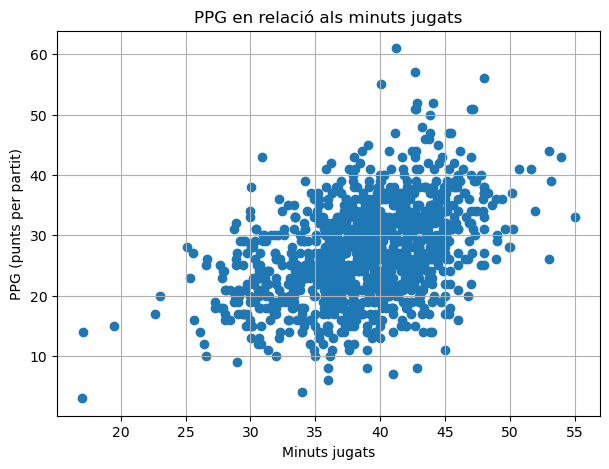

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dataset (Lebron en aquest cas)
df = pd.read_csv("lebron_career.csv", sep=";")

# (Aquí no s'utilitza l'edat, però deixo la funció per si de cas)
def extract_age(age_str):
    return int(str(age_str).split("-")[0])

# Convertir minuts de "MM:SS:00" → valor en minuts com a float
def mp_to_minutes(mp_str):
    parts = mp_str.split(":")
    return int(parts[0]) + int(parts[1]) / 60

df["mp_minutes"] = df["mp"].apply(mp_to_minutes)

# ------ CALCULAR PPG (punt per partit) ------
# En aquest dataset, cada fila és un partit → PPG = pts
df["ppg"] = df["pts"]

# ------ GRÀFICS ------

# 1. PPG vs MINUTS JUGATS
plt.figure(figsize=(7,5))
plt.scatter(df["mp_minutes"], df["ppg"])
plt.xlabel("Minuts jugats")
plt.ylabel("PPG (punts per partit)")
plt.title("PPG en relació als minuts jugats")
plt.grid(True)
plt.show()